
# A Machine Learning Approach to Cardiotocography Interpretation
### Authors: Holly Figueroa & Karlie Schwartzwald

## Milestone 3 - Preliminary Analysis

### Summary Objective
Our goals is to explore data and prepare it for modeling. Data will be used to train two models, A neural network and naive Bayes classifier to predict our multinomial target "fetal_health". These models can be sensative to outliers,imbalanced data, unscaled data, and non-normalized data. 

* How are our variables distributed
* What variables should kept or removed and why
* What variables require scaling or normalization 
* Do any variables have missing data/How will we handle missing data
* Rationale for the non-removal of outliers, if relevant
* Variable descriptions, visualizations, and summaries
* Concluding remarks write-up

### Data Cleaning

First we will import our data and libraries, then we will examine a sample of the dataframe.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from brokenaxes import brokenaxes

In [2]:
# Load data and view
fetal_health = pd.read_csv('fetal_health.csv')
fetal_health.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


We will also edit the column names for readability and typos, as well as creating a dictionary of descriptions for our variables for easy reference. 

In [3]:
# Review column names for any edits
fetal_health.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [4]:
# Correct typos and inconsistencies on column names
fetal_health.rename({
                    'prolongued_decelerations':'prolonged_decelerations',
                    'abnormal_short_term_variability':'pc_short_term_ab_variability', 
                    'mean_value_of_short_term_variability':'mean_short_term_variability', 
                    'percentage_of_time_with_abnormal_long_term_variability':'pc_long_term_ab_variability',
                    'mean_value_of_long_term_variability':'mean_long_term_variability',
                    'histogram_number_of_peaks':'histogram_peak_count',
                    'histogram_number_of_zeros':'histogram_zero_count'
                    }, axis = 1, inplace = True)

In [5]:
# Create a list of descriptions for each column to create a reference table
info = [
        'baseline hear beats per minute', 
        'accelerations per second',
        'fetal movements per second',
        'uterine contractions per second',
        'light decelerations per second',
        'severe decelerations per second',
        'prolonged decelerations per second',
        'percentage of time with abnormal short term variability',
        'mean value of short term variability',
        'percentage of time with abnormal long term variability',
        'mean value of long term variability',
        'width of the fetal heart rate histogram',
        'minimum of fetal heart rate histogram',
        'maximum of FHR histogram',
        'number of histogram peaks',
        'number of histogram zeros',
        'histogram mode',
        'histogram mean',
        'histogram median',
        'histogram variance',
        'histogram tendency',
        'fetal state class code: N=normal   S=suspect  P=pathologic'
       ]

In [6]:
var_info = pd.DataFrame({'Variable Name': fetal_health.columns,'Description': info})

In [7]:
# Display variables and their descriptions for reference
with pd.option_context('display.max_colwidth', None):
  display(var_info.style.set_properties(**{'text-align': 'left'}))

,Variable Name,Description
0,baseline value,baseline hear beats per minute
1,accelerations,accelerations per second
2,fetal_movement,fetal movements per second
3,uterine_contractions,uterine contractions per second
4,light_decelerations,light decelerations per second
5,severe_decelerations,severe decelerations per second
6,prolonged_decelerations,prolonged decelerations per second
7,pc_short_term_ab_variability,percentage of time with abnormal short term variability
8,mean_short_term_variability,mean value of short term variability
9,pc_long_term_ab_variability,percentage of time with abnormal long term variability


#### Missing Values

In [8]:
print('COLUMN LABEL                                          NULL VALUES \n')
for col in fetal_health.columns:
    print('{:_<60}'.format(col), fetal_health[col].isnull().sum())

COLUMN LABEL                                          NULL VALUES 

baseline value______________________________________________ 0
accelerations_______________________________________________ 0
fetal_movement______________________________________________ 0
uterine_contractions________________________________________ 0
light_decelerations_________________________________________ 0
severe_decelerations________________________________________ 0
prolonged_decelerations_____________________________________ 0
pc_short_term_ab_variability________________________________ 0
mean_short_term_variability_________________________________ 0
pc_long_term_ab_variability_________________________________ 0
mean_long_term_variability__________________________________ 0
histogram_width_____________________________________________ 0
histogram_min_______________________________________________ 0
histogram_max_______________________________________________ 0
histogram_peak_count______________________________

## Univarate EDA

Next we will explore the analysis of single variables in the dataset using descriptive statistics and plotting histograms.

#### Target Feature - Fetal Health Outcome

Text(0, 0.5, 'Count')

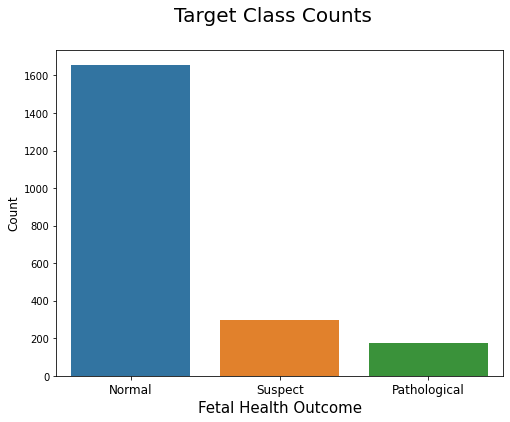

In [50]:
plt.figure(figsize = (8,6))
ax = sns.countplot(data = fetal_health, x = 'fetal_health')
ax.set_xticks(ticks = [.0,1,2], labels= ['Normal','Suspect','Pathological'], fontsize = 12)
plt.suptitle('Target Class Counts', fontsize=20)
ax.set_xlabel('Fetal Health Outcome', fontsize=15)
ax.set_ylabel('Count', fontsize= 12)

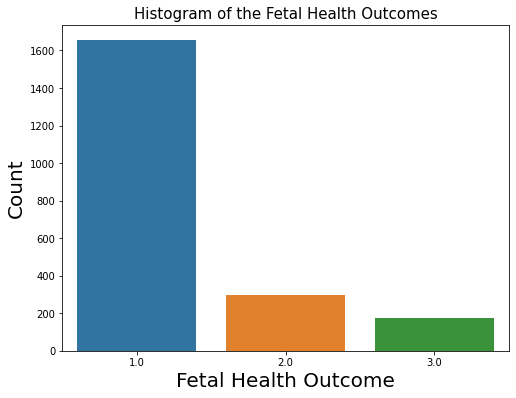

In [23]:
plt.figure(figsize = (8,6))
sns.countplot(data = fetal_health, x = 'fetal_health')
plt.title("Histogram of the Fetal Health Outcomes", fontsize = 15)
plt.ylabel('Count', fontsize = 20)
plt.xlabel('Fetal Health Outcome', fontsize = 20)
plt.show()

In [10]:
fetal_health['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [11]:
fetal_health['fetal_health'].describe()

count    2126.000000
mean        1.304327
std         0.614377
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: fetal_health, dtype: float64

Our target feature, 'fetal_health' is a categorical class for fetal heart health with 1 = Normal, 2 = Suspect, 3 = Pathological. The distribution of our three classes are very imbalanced with 'normal' measures having a count of over 1600, 'suspect' having approx 300, and 'pathological' under 200.

### Movement Features

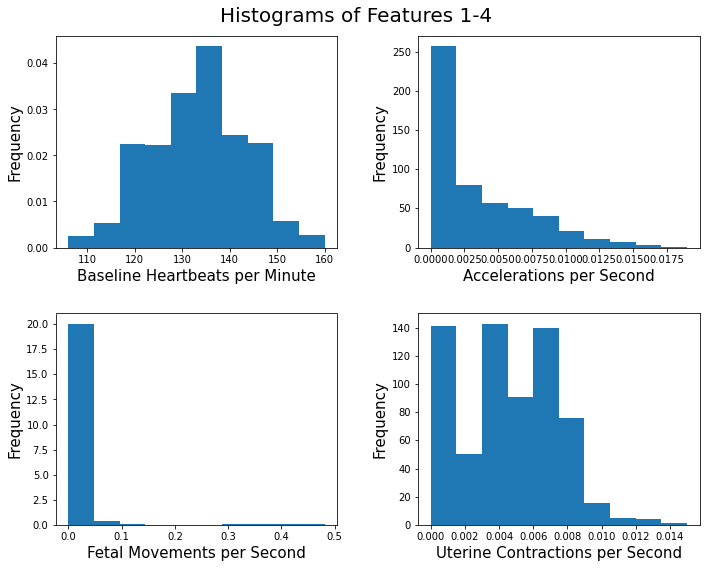

In [12]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (10,8))
# first four histograms

fig.suptitle('Histograms of Features 1-4', fontsize=20)

ax1.hist(fetal_health['baseline value'], bins=10, density=True)
ax1.set_xlabel("Baseline Heartbeats per Minute", fontsize = 15)
ax1.set_ylabel("Frequency", fontsize = 15)


ax2.hist(fetal_health['accelerations'], bins=10, density=True)
ax2.set_xlabel( "Accelerations per Second", fontsize = 15)
ax2.set_ylabel("Frequency", fontsize = 15)


ax3.hist(fetal_health['fetal_movement'], bins=10, density=True)
ax3.set_xlabel("Fetal Movements per Second", fontsize = 15)
ax3.set_ylabel("Frequency", fontsize = 15)

ax4.hist(fetal_health['uterine_contractions'], bins=10, density=True)
ax4.set_xlabel("Uterine Contractions per Second", fontsize =15)
ax4.set_ylabel("Frequency", fontsize = 15)


# space between the plots
plt.tight_layout(w_pad = 3,h_pad = 3)
plt.show()

#### Baseline Fetal Heart Rate

In [13]:
fetal_health['baseline value'].describe()

count    2126.000000
mean      133.303857
std         9.840844
min       106.000000
25%       126.000000
50%       133.000000
75%       140.000000
max       160.000000
Name: baseline value, dtype: float64

The distribution of fetal heartbeat measurements is approximately normal, slightly leptokurtic, with a center around 133 beats per minute. Values range from approx 110 to 160 beats per minute. 

#### Accelerations of Fetal Heart Rate

In [14]:
fetal_health['accelerations'].describe()

count    2126.000000
mean        0.003178
std         0.003866
min         0.000000
25%         0.000000
50%         0.002000
75%         0.006000
max         0.019000
Name: accelerations, dtype: float64

Values for acceleration of fetal heart rate all between approximately 0.00 to 0.0175. This distribution is sharply skewed to the right, with the most common measurements being at or near 0.000 accelerations per second.

#### Number of Fetal Movements per Second 

In [15]:
fetal_health['fetal_movement'].describe()

count    2126.000000
mean        0.009481
std         0.046666
min         0.000000
25%         0.000000
50%         0.000000
75%         0.003000
max         0.481000
Name: fetal_movement, dtype: float64

In [16]:
fetal_health['fetal_movement'].value_counts().sort_index()

0.000    1311
0.001     164
0.002     112
0.003      88
0.004      49
         ... 
0.455       1
0.469       1
0.470       1
0.477       1
0.481       1
Name: fetal_movement, Length: 102, dtype: int64

In [17]:
# Get count for fetal movement values under 0.1
len(fetal_health[fetal_health['fetal_movement'] < 0.05])

2054

In [18]:
# Get number of total measurements for fetal movement
len(fetal_health['fetal_movement'])

2126

In [19]:
# Find percentage of values under 0.001 for movements per second
2054/2126

0.9661335841956726

The distribution of values is skewed to the right and features a gap. Values range between 0 and 0.5. The histogram shows the majority of values fall at or near 0 at such a high proportion, it is diffcult to view the frequecies of higher values. A value count conducted above confirms the peak at zero accounts for nearly 97% of all observations.

#### Number of Uterine Contractions per Second  

In [20]:
fetal_health['uterine_contractions'].describe()

count    2126.000000
mean        0.004366
std         0.002946
min         0.000000
25%         0.002000
50%         0.004000
75%         0.007000
max         0.015000
Name: uterine_contractions, dtype: float64

The ditribution for uterine contractions appears positively skewed, and has a non-normal distribution. The frequencies feature three peaks. Values range between 0.000 and 0.014, with frequencies peaking around 0.00, 0.004, and 0.007. 

### Light, Severe, and Prolonged Decelerations per Second

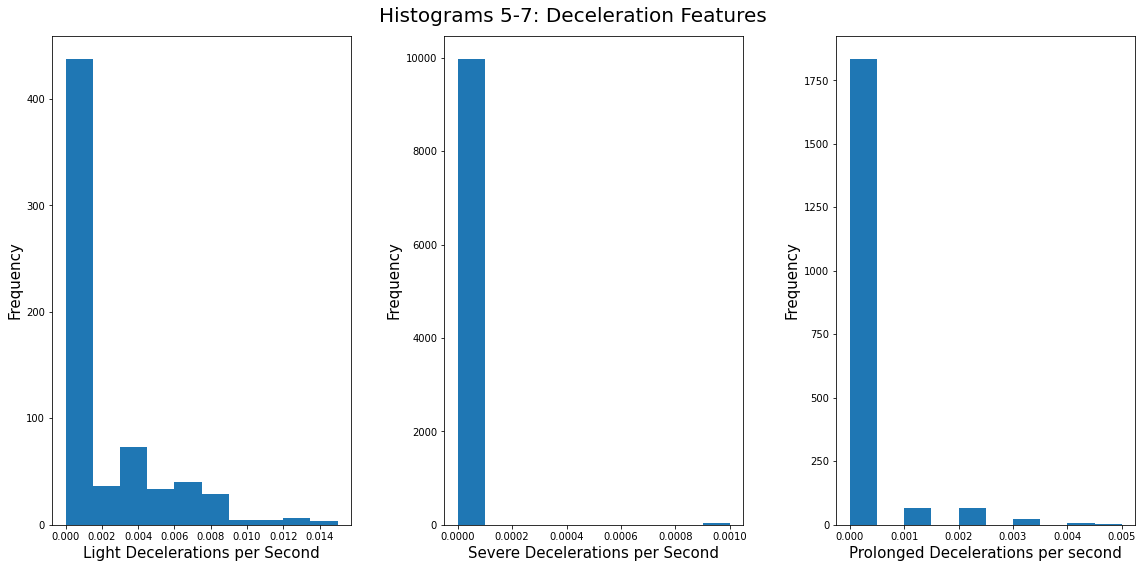

In [21]:
fig, ((ax1, ax2,ax3))= plt.subplots(1,3, figsize = (16,8))
# decelerations histogram

fig.suptitle('Histograms 5-7: Deceleration Features', fontsize=20)

ax1.hist(fetal_health['light_decelerations'], bins=10, density=True)
ax1.set_xlabel("Light Decelerations per Second", fontsize = 15)
ax1.set_ylabel("Frequency", fontsize = 15)


ax2.hist(fetal_health['severe_decelerations'], bins=10, density=True)
ax2.set_xlabel( "Severe Decelerations per Second", fontsize = 15)
ax2.set_ylabel("Frequency", fontsize = 15)


ax3.hist(fetal_health['prolonged_decelerations'], bins=10, density=True)
ax3.set_xlabel("Prolonged Decelerations per second", fontsize = 15)
ax3.set_ylabel("Frequency", fontsize = 15)

# space between the plots
plt.tight_layout(w_pad = 3,h_pad = 3)
plt.show()

#### Light Decelerations per Second  

In [22]:
fetal_health['light_decelerations'].describe()

count    2126.000000
mean        0.001889
std         0.002960
min         0.000000
25%         0.000000
50%         0.000000
75%         0.003000
max         0.015000
Name: light_decelerations, dtype: float64

Values range from 0.000 to over 0.014 light decelerations per second. The distribution is strongly positively skewed and peaks at 0.000, as the mode. 

#### Severe Decelerations per Second

In [23]:
# Examing value counts for severe_decelerations
fetal_health['severe_decelerations'].value_counts()

0.000    2119
0.001       7
Name: severe_decelerations, dtype: int64

In [24]:
# Get percentage of total represented by non-0 values
7/fetal_health['severe_decelerations'].shape[0]

0.003292568203198495

In [25]:
fetal_health['severe_decelerations'].describe()

count    2126.000000
mean        0.000003
std         0.000057
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.001000
Name: severe_decelerations, dtype: float64

The distrubution for severe decelerations is highly imbalanced and value count confirmed the values for declerations are effectively binary, with all values either at 0.000 or 0.001. Referencing value counts we find measures of 0.001 represent .3% of the total values, making them candidates to be treated as outliers. We have no reason at this time to assume these measures are mistakes, or invalid in any way, however, this distribution suggests it may not prove helpful to our model. 

#### Prolonged Decelerations per Second

In [26]:
fetal_health['prolonged_decelerations'].describe()

count    2126.000000
mean        0.000159
std         0.000590
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.005000
Name: prolonged_decelerations, dtype: float64

In [27]:
fetal_health['prolonged_decelerations'].value_counts()

0.000    1948
0.002      72
0.001      70
0.003      24
0.004       9
0.005       3
Name: prolonged_decelerations, dtype: int64

In [28]:
1948/fetal_health['prolonged_decelerations'].shape[0]

0.916274694261524

The distribution for prolonged decelerations per second is skewed to the right, peaking at 0.000. Values range from 0.000 to 0.005. Referencing value counts we find that values above 0.000 represent approx 9% of the total measurements taken. 

### Variability Features

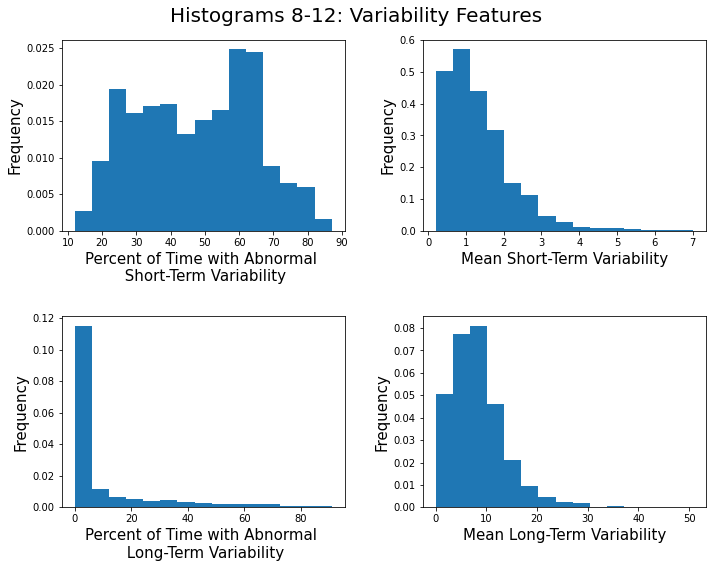

In [29]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (10,8))
# "baseline value" histogram

fig.suptitle('Histograms 8-12: Variability Features', fontsize=20)

ax1.hist(fetal_health['pc_short_term_ab_variability'], bins=15, density=True)
ax1.set_xlabel("Percent of Time with Abnormal \n Short-Term Variability", fontsize = 15)
ax1.set_ylabel("Frequency", fontsize = 15)


ax2.hist(fetal_health['mean_short_term_variability'], bins=15, density=True)
ax2.set_xlabel( "Mean Short-Term Variability", fontsize = 15)
ax2.set_ylabel("Frequency", fontsize = 15)


ax3.hist(fetal_health['pc_long_term_ab_variability'], bins=15, density=True)
ax3.set_xlabel("Percent of Time with Abnormal \n Long-Term Variability", fontsize = 15)
ax3.set_ylabel("Frequency", fontsize = 15)

ax4.hist(fetal_health['mean_long_term_variability'], bins=15, density=True)
ax4.set_xlabel("Mean Long-Term Variability", fontsize =15)
ax4.set_ylabel("Frequency", fontsize = 15)


# space between the plots
plt.tight_layout(w_pad = 3,h_pad = 3)
plt.show()

#### Percent of time with Abnormal Short_term Variability

In [30]:
fetal_health['pc_short_term_ab_variability'].describe()

count    2126.000000
mean       46.990122
std        17.192814
min        12.000000
25%        32.000000
50%        49.000000
75%        61.000000
max        87.000000
Name: pc_short_term_ab_variability, dtype: float64

The ditribution of time appears bimodal, peaking near 25 and 60 percent. The mode at 60 percent is significantly larger than the one at 25. There do not appear to be any outliers with all datapoints falling in the range of 10-90%. 

#### Mean Short-Term Variability

In [31]:
fetal_health['mean_short_term_variability'].describe()

count    2126.000000
mean        1.332785
std         0.883241
min         0.200000
25%         0.700000
50%         1.200000
75%         1.700000
max         7.000000
Name: mean_short_term_variability, dtype: float64

This distribution is skewed to the right. It has a mean of approximately 1.3 and a standard deviation of about 0.9. This dataset contains outliers near the value of 7. These, however are likely legitimate measures, rather than a result of any error. 

#### Percent of Time with Abnormal Long-Term Variability

In [32]:
fetal_health['pc_long_term_ab_variability'].describe()

count    2126.00000
mean        9.84666
std        18.39688
min         0.00000
25%         0.00000
50%         0.00000
75%        11.00000
max        91.00000
Name: pc_long_term_ab_variability, dtype: float64

This distribution is highly skewed with the vast majority of instances recording zero. It appears to be an exponential decay, so it may be suitable for logarithmic transformation. With a standard deviation almost twice that of the mean, we can conclude this distribution has a very large spread.

#### Mean Long-Term Variability

In [33]:
fetal_health['mean_long_term_variability'].describe()

count    2126.000000
mean        8.187629
std         5.628247
min         0.000000
25%         4.600000
50%         7.400000
75%        10.800000
max        50.700000
Name: mean_long_term_variability, dtype: float64

This disribution is also skewed to the right but not as much as the mean long-term variability. The mode is nonzero and appears to be around 10, which is also close to the mean at 8. There are also outliers in the high end of the distribution. 

### Histogram Features

In [34]:
# Create subset of histogram features
hist_features = fetal_health.iloc[:,11:2]

#### Histogram Width

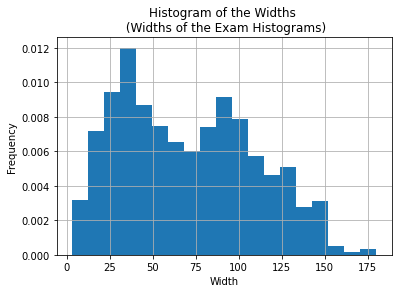

In [35]:
# "histogram_width" histogram
fetal_health['histogram_width'].hist(bins='auto', density=True)
plt.title("Histogram of the Widths \n (Widths of the Exam Histograms)")
plt.xlabel("Width")
plt.ylabel("Frequency")
plt.show()

In [36]:
fetal_health['histogram_width'].describe()

count    2126.000000
mean       70.445908
std        38.955693
min         3.000000
25%        37.000000
50%        67.500000
75%       100.000000
max       180.000000
Name: histogram_width, dtype: float64

The distribution of the widths of the histograms appears to be bimodal, with peaks near 30 and 85, and a mean of approximately 70. The distribution is also skewed right and appears to have some outliers with values about 160.

#### Histogram Minimum

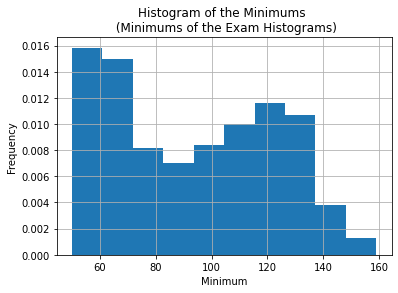

In [37]:
# "histogram_min" histogram
fetal_health['histogram_min'].hist(bins=10, density=True)
plt.title("Histogram of the Minimums \n (Minimums of the Exam Histograms)")
plt.xlabel("Minimum")
plt.ylabel("Frequency")
plt.show()

In [38]:
fetal_health['histogram_min'].describe()

count    2126.000000
mean       93.579492
std        29.560212
min        50.000000
25%        67.000000
50%        93.000000
75%       120.000000
max       159.000000
Name: histogram_min, dtype: float64

The distribution of the minimums of the histograms is also bimodal, with peaks near 55 and 120. The peak near 55 is taller than the peak near 120. This distribution is also skewed to the right but does not appear to have any outliers.  

#### Histogram Maximum

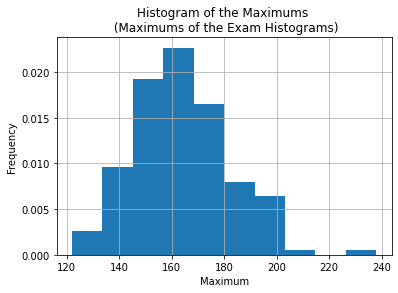

In [39]:
# "histogram_max" histogram
fetal_health['histogram_max'].hist(bins=10, density=True)
plt.title("Histogram of the Maximums \n (Maximums of the Exam Histograms)")
plt.xlabel("Maximum")
plt.ylabel("Frequency")
plt.show()

In [40]:
fetal_health['histogram_max'].describe()

count    2126.000000
mean      164.025400
std        17.944183
min       122.000000
25%       152.000000
50%       162.000000
75%       174.000000
max       238.000000
Name: histogram_max, dtype: float64

This distribution is approximately normal with a mean near 164 and a slight right skew. There does appear to be some outliers near on the high end, with a max of 238.

#### Histogram Peak Count

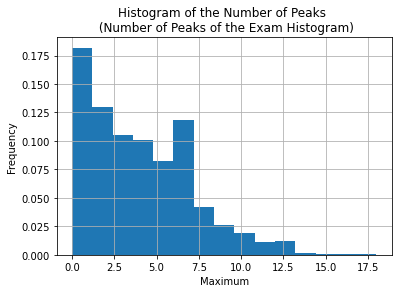

In [41]:
# "histogram_number_of_peaks" histogram
fetal_health['histogram_peak_count'].hist(bins=15, density=True)
plt.title("Histogram of the Number of Peaks \n (Number of Peaks of the Exam Histogram)")
plt.xlabel("Maximum")
plt.ylabel("Frequency")
plt.show()

In [42]:
fetal_health['histogram_peak_count'].describe()

count    2126.000000
mean        4.068203
std         2.949386
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        18.000000
Name: histogram_peak_count, dtype: float64

This distribution of peak count is highly skewed to the right. Although the distribution is generally monotone decreasing, there does appear to be a local maxima near 7. The mean of the distribution is 4 and the standard deviation is almost 3, meaning that the distribution has a very wide spread.

#### Histogram Number of Zeros

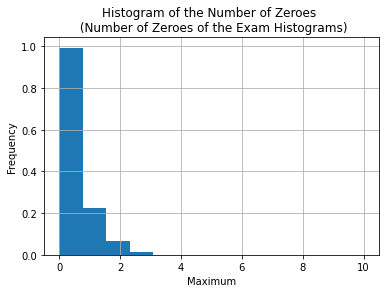

In [43]:
# "histogram_number_of_zeroes" histogram
fetal_health['histogram_number_of_zeroes'].hist(bins='auto', density=True)
plt.title("Histogram of the Number of Zeroes \n (Number of Zeroes of the Exam Histograms)")
plt.xlabel("Maximum")
plt.ylabel("Frequency")
plt.show()

In [44]:
# "histogram_number_of_zeroes" histogram
fetal_health['histogram_number_of_zeroes'].describe()

count    2126.000000
mean        0.323612
std         0.706059
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        10.000000
Name: histogram_number_of_zeroes, dtype: float64

The vast majority of instances have a value of zero in this case. Thus the distribution is heavliy skewed to the right and will likely need to be transformed, possibly with a logarithmic transformation as the distribution appears to be exponentially decaying.

#### Histogram Modes

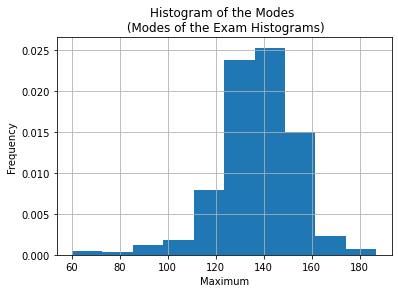

In [45]:
# "histogram_mode" histogram
fetal_health['histogram_mode'].hist(bins=10, density=True)
plt.title("Histogram of the Modes \n (Modes of the Exam Histograms)")
plt.xlabel("Maximum")
plt.ylabel("Frequency")
plt.show()

In [46]:
fetal_health['histogram_mode'].describe()

count    2126.000000
mean      137.452023
std        16.381289
min        60.000000
25%       129.000000
50%       139.000000
75%       148.000000
max       187.000000
Name: histogram_mode, dtype: float64

This distribution appears to be distrubted rather normally. With a mean of approximately 137 and a standard deviaton of only 16, the distribution has a very small spread and is possibly leptokurtic. The outliers in this case are on the small end of the distribution with values close to 60.

#### Histogram Means

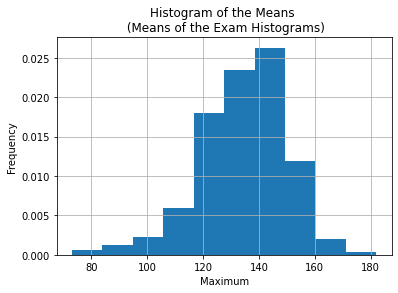

In [47]:
# "histogram_mean" histogram
fetal_health['histogram_mean'].hist(bins=10, density=True)
plt.title("Histogram of the Means \n (Means of the Exam Histograms)")
plt.xlabel("Maximum")
plt.ylabel("Frequency")
plt.show()

In [48]:
fetal_health['histogram_median'].describe()

count    2126.000000
mean      138.090310
std        14.466589
min        77.000000
25%       129.000000
50%       139.000000
75%       148.000000
max       186.000000
Name: histogram_median, dtype: float64

The dirtribution for histogram means is fairly normal, but similar to the modes, and negatively skewed. Values range from approx 80 to 190, and values center around 135. The standard deviation is 14. 

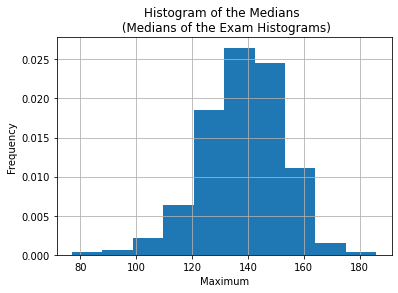

In [49]:
# "histogram_median" histogram
fetal_health['histogram_median'].hist(bins=10, density=True)
plt.title("Histogram of the Medians \n (Medians of the Exam Histograms)")
plt.xlabel("Maximum")
plt.ylabel("Frequency")
plt.show()

In [50]:
fetal_health['histogram_mode'].describe()

count    2126.000000
mean      137.452023
std        16.381289
min        60.000000
25%       129.000000
50%       139.000000
75%       148.000000
max       187.000000
Name: histogram_mode, dtype: float64

The distribution for medians is again, fairly normal and slightly negatively skewed. The values range from roughly 80-190 and center around 135. The standard deviation is 16. 

#### Histogram Variances

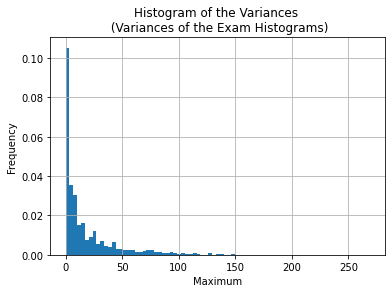

In [51]:
# "histogram_variance" histogram
fetal_health['histogram_variance'].hist(bins='auto', density=True)
plt.title("Histogram of the Variances \n (Variances of the Exam Histograms)")
plt.xlabel("Maximum")
plt.ylabel("Frequency")
plt.show()

In [52]:
fetal_health['histogram_variance'].describe()

count    2126.000000
mean       18.808090
std        28.977636
min         0.000000
25%         2.000000
50%         7.000000
75%        24.000000
max       269.000000
Name: histogram_variance, dtype: float64

This distribution is highly skewed in the positive direction, with the vast majority of occurances being near zero. The mean is 18 but the standard deviation is 29, telling us that this distribution has a large spread. We can see this distributions also has outliers with values larger than 100. These outliers appear to be representing the data accurately so we will not remove them.

#### Histogram Tendencies

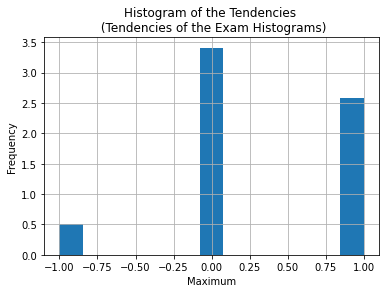

In [53]:
# "histogram_tendency" histogram
fetal_health['histogram_tendency'].hist(bins='auto', density=True)
plt.title("Histogram of the Tendencies \n (Tendencies of the Exam Histograms)")
plt.xlabel("Maximum")
plt.ylabel("Frequency")
plt.show()

In [54]:
fetal_health['histogram_tendency'].describe()

count    2126.000000
mean        0.320320
std         0.610829
min        -1.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: histogram_tendency, dtype: float64

In [55]:
fetal_health['histogram_tendency'].value_counts()

 0.0    1115
 1.0     846
-1.0     165
Name: histogram_tendency, dtype: int64

This bar chart shows us the distribution of tendencies of the histograms. We can see that most instances have a tendency of zero, with the second most likely tendenc being positive 1. A tendency of -1 was the least common measurement and consitutes less than 10% of all the records.

## Bivirate EDA

### Correlations

In [56]:
# Get dummies for our target prior to correlation matrix
dummy_fetal_health = pd.get_dummies(fetal_health, columns = ['fetal_health'])

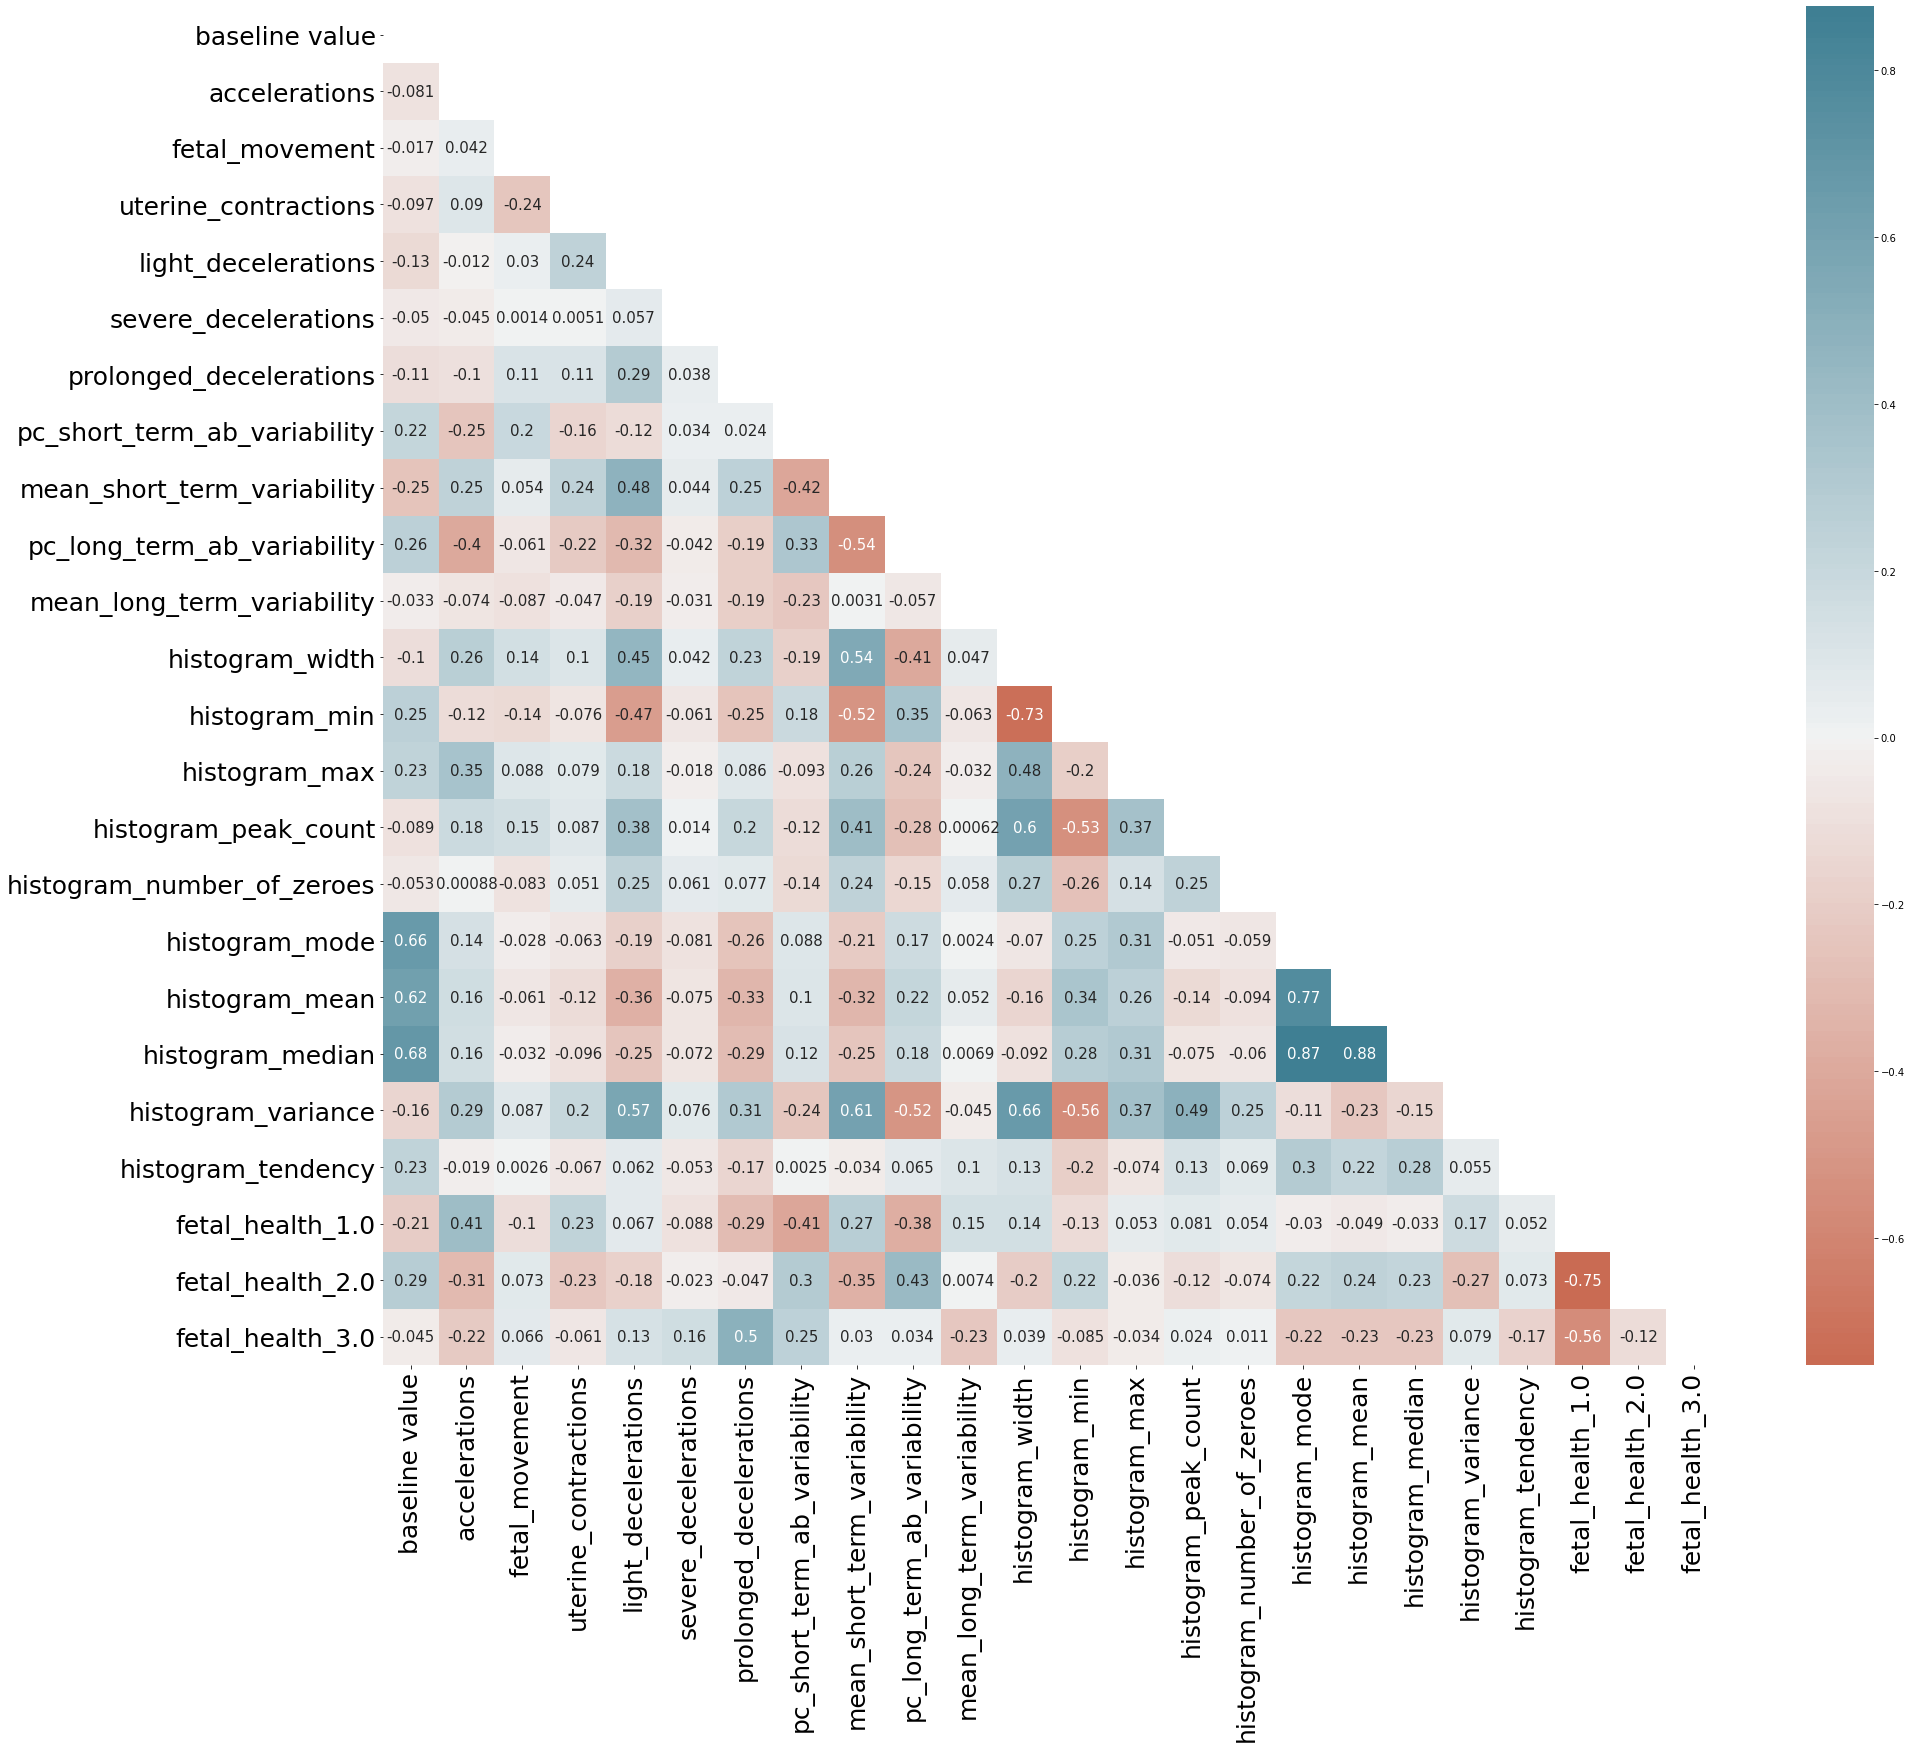

In [57]:
# Define figure sizes and axis label sizes/ticks
plt.figure(figsize = (30,25))
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
# Use a mask on the upper triangle for readability (triu - upper triangle vs tril - lower triangle)
mask = np.triu(np.ones_like(dummy_fetal_health.corr(), dtype=bool))
# Create heatmap
sns.heatmap(dummy_fetal_health.corr(method = 'kendall'),
            cmap=sns.diverging_palette(20, 220, n=200), 
            center = 0,
            mask = mask,
            annot= True,
            annot_kws = {"size": 15}
           )
plt.show()

The correlation heatmap above provides a starting point to see potential influencing features on our heart health target. It is limited, however in only capturing linear realtionships. Given our data target is not continuous and many features are not normally distributed, we have opted to employ Kendall's Tau. The largest Tau values associated with normal fetal outcome are 'pc_shor_term_ab_variability' at a Tau of -.41, and 'accelerations at .41 The largest values for a 'Suspect' fetal health outcome are 'mean_short_term_ab_variability' and 'pc_long_term_ab_variability' at -.35 and .43 Tau, respectively. While 'pathological' outcomes highest values are with 'prolonged_decelerations' at .50 Tau and 'pc_short_term_ab_variability' at .25 Tau.

The majority of the features are correlated to our target at a Tau less than .20. The matrix also highlights features that are correlated to each other. Some of which, may need to be removed so they do not disproportionately impact the results of our models. Features with the highest correlation values to our target.  

In [58]:
# Removing redundant features by finding ones that are highly correlated to eachother

# create correlation matrix
corr_matrix = fetal_health.corr()

# this function highlights high correlation values 
# re-run the kernel after opening it to see highlights
def high_corr(val):
    color = 'yellow' if (val > 0.9 or val < -0.9) else ''
    return 'background-color: {}'.format(color)

# apply highlighter to matrix
corr_matrix.style.applymap(high_corr)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolonged_decelerations,pc_short_term_ab_variability,mean_short_term_variability,pc_long_term_ab_variability,mean_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_peak_count,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,-0.032091,-0.147679,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,-0.142363,0.298631,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.364066
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,0.011047,0.162790,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,-0.066058,0.142541,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,-0.242932,0.520467,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,-0.037667,0.044880,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.131934
prolonged_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,-0.226514,0.265391,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
pc_short_term_ab_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,-0.315105,-0.260463,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
mean_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,0.073892,0.660847,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
pc_long_term_ab_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,-0.171114,-0.451297,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


This matrix was coded using a pearsons correlation method to clarify the relationship between features that are continuous, and that have been shown to be normally distributed. It has also been coded to highlight values over 90% correlated in either direction. This will act as a threshold for variable correlations that may need to be removed. From this we can see that 'histogram_mode', 'histogram_mean', and 'histogram_median' are all highly correlated together. Of the three, when referencing the previous heatmap, it would appear 'histogram_mean' has the highest Tau to all three of our target classes. For that reason, we will choose to keep the variable for histrogram mean.

In [59]:
# Drop variables
fetal_health.drop(['histogram_mode','histogram_median'], axis=1, inplace=True)

### Movement Features

#### Fetal Health Vs. Baseline Fetal Heart Rate

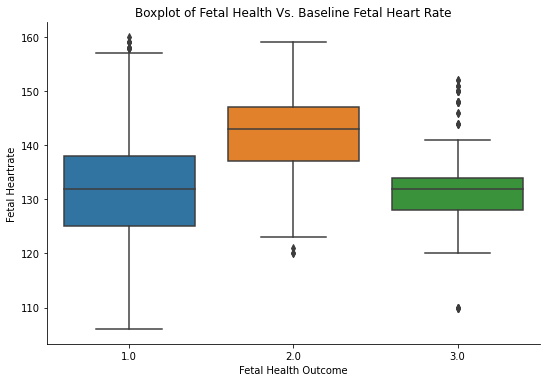

In [60]:
# boxplots of fetal health vs baseline value
sns.catplot(x="fetal_health", y="baseline value", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Baseline Fetal Heart Rate")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Fetal Heartrate")
plt.xticks(rotation=0)
plt.show()

This boxplot does not show any clear correlation between these features, but we can see that fetuses with a featal health outcome of 2 typically have higher heartrates.

#### Fetal Health Vs. Accelerations of Fetal Heart Rate

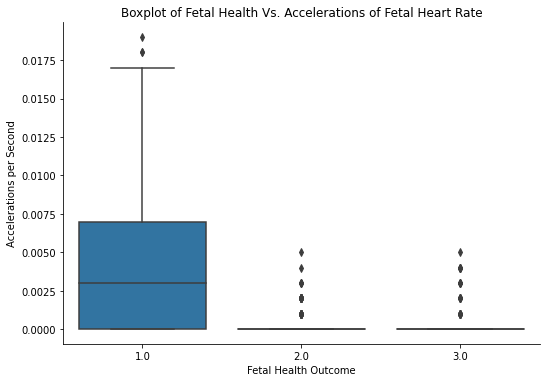

In [61]:
# boxplots of fetal health vs accelerations
sns.catplot(x="fetal_health", y="accelerations", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Accelerations of Fetal Heart Rate")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Accelerations per Second")
plt.xticks(rotation=0)
plt.show()

From this boxplot we can see there is a clear negative correlation between accelerations per second and fetal health outcomes. The healthy fetal health category is the only one with a nonzero median.

#### Fetal Health Vs. Number of Fetal Movements per Second

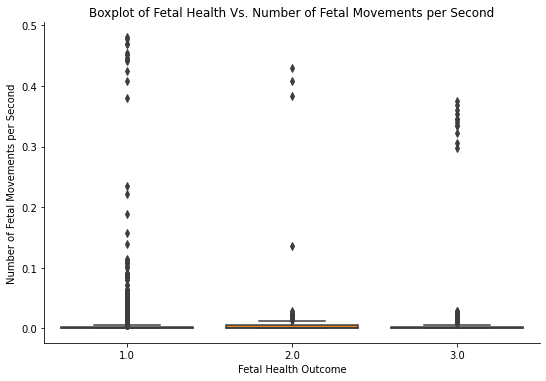

In [62]:
# boxplots of fetal health vs fetal_movement
sns.catplot(x="fetal_health", y="fetal_movement", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Number of Fetal Movements per Second")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Number of Fetal Movements per Second")
plt.xticks(rotation=0)
plt.show()

These boxplots do not give us a clear sense of correlation for these two variables, but it does show us the large number of outliers we have in this feature.

#### Fetal Health Vs. Number of Uterine Contractions per Second

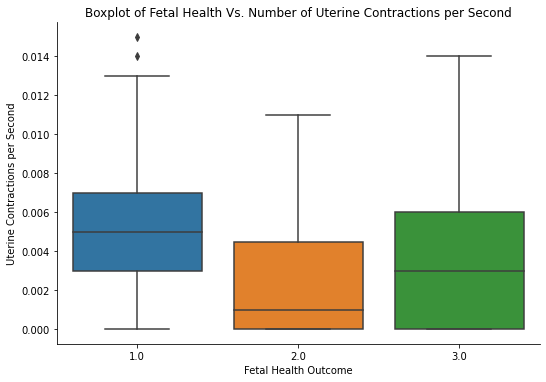

In [63]:
# boxplots of fetal health vs uterine_contractions
sns.catplot(x="fetal_health", y="uterine_contractions", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Number of Uterine Contractions per Second")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Uterine Contractions per Second")
plt.xticks(rotation=0)
plt.show()

Again there is no clear correlation from these boxplots but we do see that fetal health outcome of healthy is associated with a higher variance in uterine contractions per second.

### Light, Severe, and Prolonged Decelerations per Second

#### Fetal Health Vs. Number of Light Decelerations per Second

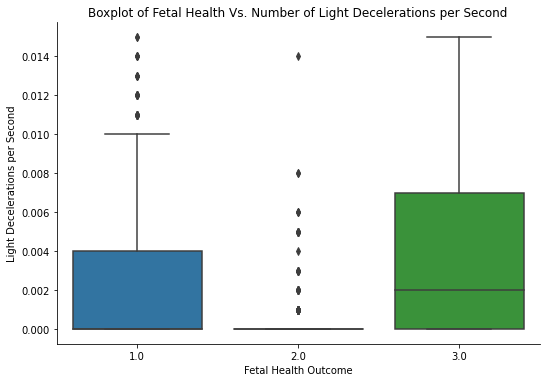

In [64]:
# boxplots of fetal health vs light_decelerations
sns.catplot(x="fetal_health", y="light_decelerations", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Number of Light Decelerations per Second")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Light Decelerations per Second")
plt.xticks(rotation=0)
plt.show()

While the correlation is not directly noticable from these boxplots, we can see that the average light decerations per second is the highest for the fetal health outcome of three.

#### Fetal Health Vs. Number of Severe Decelerations per Second

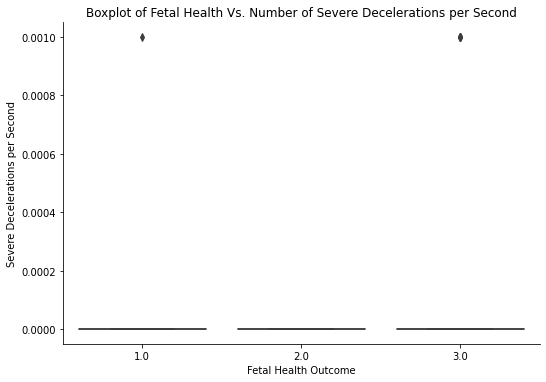

In [65]:
# boxplots of fetal health vs severe_decelerations
sns.catplot(x="fetal_health", y="severe_decelerations", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Number of Severe Decelerations per Second")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Severe Decelerations per Second")
plt.xticks(rotation=0)
plt.show()

In [66]:
fetal_health['severe_decelerations'].value_counts()

0.000    2119
0.001       7
Name: severe_decelerations, dtype: int64

In [67]:
severe_dec = fetal_health[fetal_health['severe_decelerations'] == 0.001]
severe_dec['fetal_health']

1488    1.0
1489    3.0
1791    3.0
1792    3.0
1793    3.0
1794    3.0
1795    3.0
Name: fetal_health, dtype: float64

This boxplot is nearly useless as it shows us very little about the data except that there are some outliers. The mean of each of the categories is close to zero, as over 99% of the instances measure a zero for this feature. However, within the feature count it can be seen that nearly every, non-zero measure belongs to an observation labeled as having a 'pathological' fetal health outcome.

#### Fetal Health Vs. Number of Prolonged Decelerations per Second

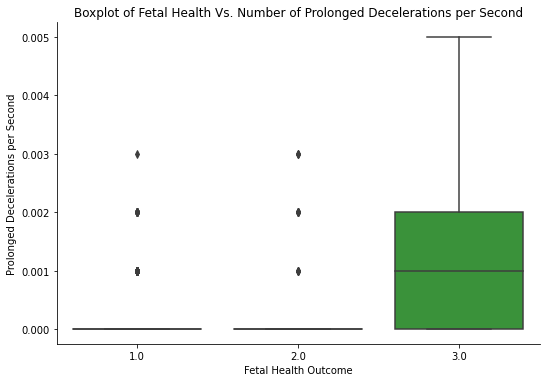

In [68]:
# boxplots of fetal health vs prolongued_decelerations
sns.catplot(x="fetal_health", y="prolonged_decelerations", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Number of Prolonged Decelerations per Second")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Prolonged Decelerations per Second")
plt.xticks(rotation=0)
plt.show()

There is a clear strong correlation between prolonged decelerations and fetal health outcome. Fetuses with an unhealthy fetal health outcome are significantly more likely to have prolonged decelerations.

#### Fetal Health Vs. Percentage of Time with Abnormal Short Term Variability

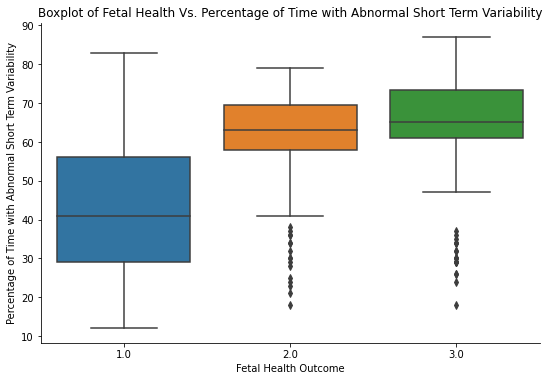

In [69]:
# boxplots of fetal health vs abnormal_short_term_variability
sns.catplot(x="fetal_health", y="pc_short_term_ab_variability", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Percentage of Time with Abnormal Short Term Variability")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Percentage of Time with Abnormal Short Term Variability")
plt.xticks(rotation=0)
plt.show()

There appears to be a negative correlation between the percentage of time with abnormal short term variability and fetal health. As the percentage of time increases, the patient is more lilely to be in the unhealthy category.

#### Fetal Health Vs. Mean Values of Short Term Variability

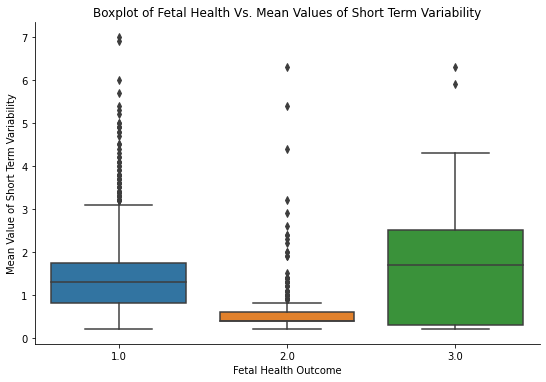

In [70]:
# boxplots of fetal health vs mean_value_of_short_term_variability
sns.catplot(x="fetal_health", y="mean_short_term_variability", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Mean Values of Short Term Variability")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Mean Value of Short Term Variability")
plt.xticks(rotation=0)
plt.show()

There is no clear correlation from this graph but we can see that patients with an unhealthy fetal health outcome haev a mich higher variance in this feature.

#### Fetal Health Vs. Percentage of Time with Abnormal Long Term Variability

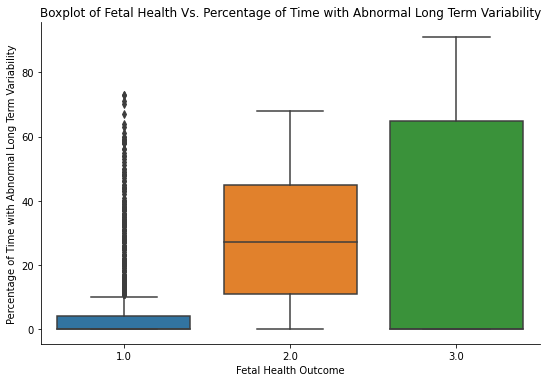

In [71]:
# boxplots of fetal health vs percentage_of_time_with_abnormal_long_term_variability
sns.catplot(x="fetal_health", y="pc_long_term_ab_variability", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Percentage of Time with Abnormal Long Term Variability")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Percentage of Time with Abnormal Long Term Variability")
plt.xticks(rotation=0)
plt.show()

According to the boxplots there is no clear correlation between these variables. Even though fetal health outcome of three has a higher variance, it still has a mean of nearly zero, lower than that for patients with fetal health outcome of 2.

#### Fetal Health Vs. Mean Values of Long Term Variability

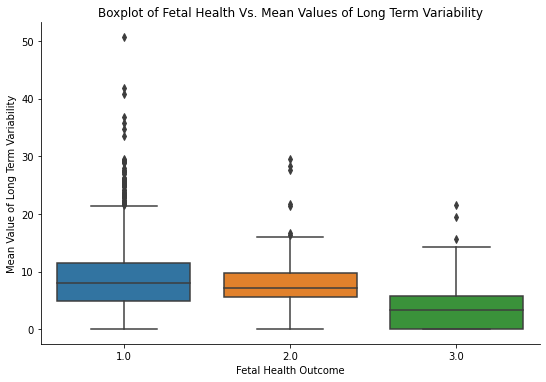

In [72]:
# boxplots of fetal health vs mean_value_of_long_term_variability
sns.catplot(x="fetal_health", y="mean_long_term_variability", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Mean Values of Long Term Variability")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Mean Value of Long Term Variability")
plt.xticks(rotation=0)
plt.show()

According to the boxplots, there is a negative correlation between  the mean vaue of long term variablity and fetal health outcome. The mean value for the patients with fetal health outcome of one is higher than for those with fetal health outcome of two and even higher than those with fetal health outcome of three.

### Histogram Features

#### Fetal Health Vs. Width

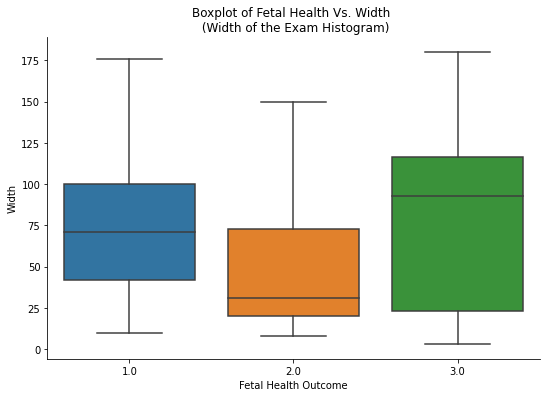

In [73]:
# boxplots of fetal health vs histogram_width
sns.catplot(x="fetal_health", y="histogram_width", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Width \n (Width of the Exam Histogram)")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Width")
plt.xticks(rotation=0)
plt.show()

There is no clear correlation displayed by these boxcharts and no clear visual outliers as well.

#### Fetal Health Vs. Minimum

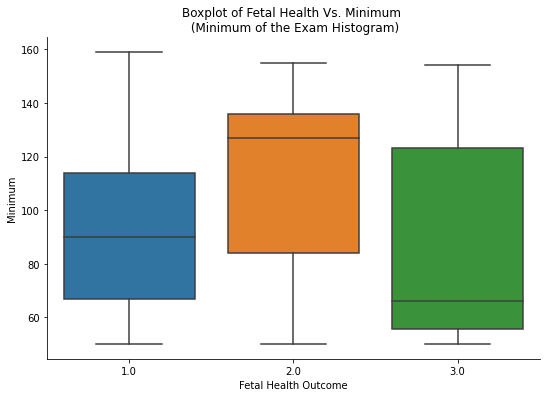

In [74]:
# boxplots of fetal health vs histogram_min
sns.catplot(x="fetal_health", y="histogram_min", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Minimum \n (Minimum of the Exam Histogram)")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Minimum")
plt.xticks(rotation=0)
plt.show()

There is no clear correlation displayed by these boxcharts and no clear visual outliers as well.

#### Fetal Health Vs. Maximum

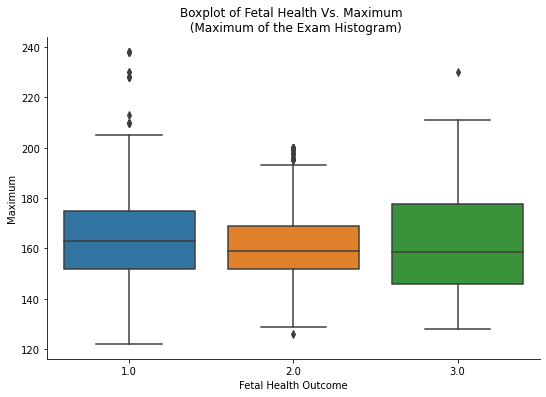

In [75]:
# boxplots of fetal health vs histogram_max
sns.catplot(x="fetal_health", y="histogram_max", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Maximum \n (Maximum of the Exam Histogram)")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Maximum")
plt.xticks(rotation=0)
plt.show()

There is no clear correlation displayed by these boxcharts but we do have some outliers shown by the boxplots. We can see that for each of the outcomes, the mean is close to each other. Thus, we can conclude that the correlation is proably close to zero.

#### Fetal Health Vs. Number of Peaks

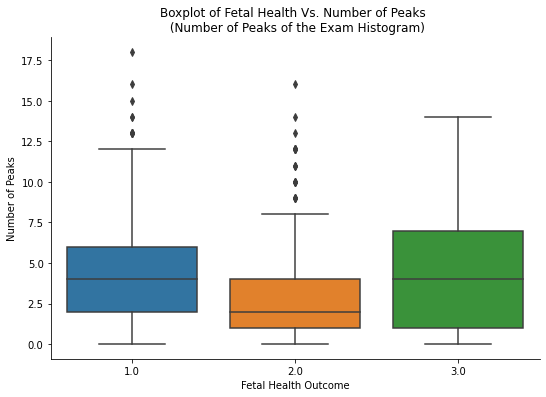

In [76]:
# boxplots of fetal health vs histogram_number_of_peaks
sns.catplot(x="fetal_health", y="histogram_peak_count", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Number of Peaks \n (Number of Peaks of the Exam Histogram)")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Number of Peaks")
plt.xticks(rotation=0)
plt.show()

There is no clear correlation displayed by these boxcharts but we do have some outliers shown by the boxplots.

#### Fetal Health Vs. Number of Zeroes

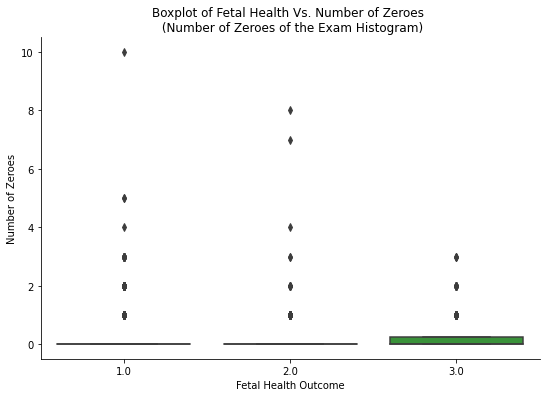

In [77]:
# boxplots of fetal health vs histogram_number_of_zeroes
sns.catplot(x="fetal_health", y="histogram_number_of_zeroes", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Number of Zeroes \n (Number of Zeroes of the Exam Histogram)")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Number of Zeroes")
plt.xticks(rotation=0)
plt.show()

These boxplots show us that nearly all the histograms had no zeroes. There is a possible positive correlation here between the number of zeroes and the fetal health outcome.

#### Fetal Health Vs. Mean

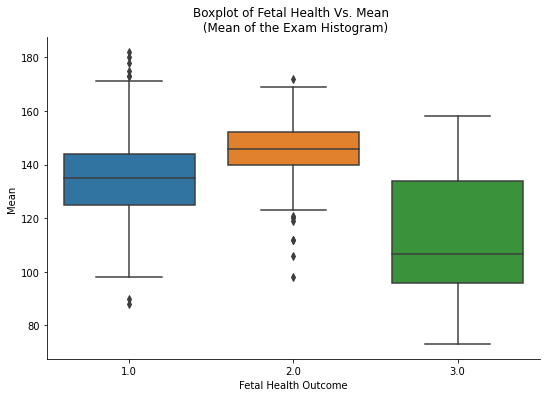

In [78]:
# boxplots of fetal health vs histogram_mean
sns.catplot(x="fetal_health", y="histogram_mean", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Mean \n (Mean of the Exam Histogram)")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Mean")
plt.xticks(rotation=0)
plt.show()

There is no clear correlation displayed by these boxcharts but we do have some outliers shown by the boxplots.

#### Fetal Health Vs. Variance

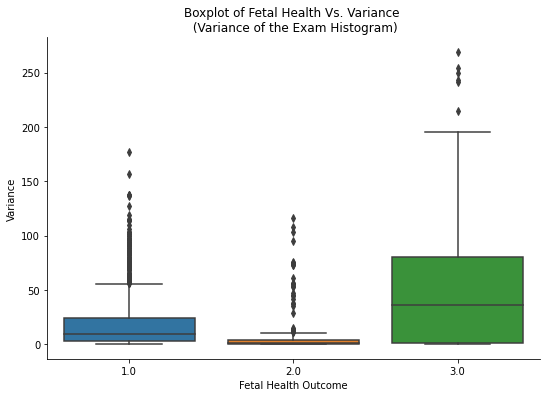

In [79]:
# boxplots of fetal health vs histogram_variance
sns.catplot(x="fetal_health", y="histogram_variance", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Variance \n (Variance of the Exam Histogram)")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Variance")
plt.xticks(rotation=0)
plt.show()

There is no clear correlation displayed by these boxcharts but we do have some outliers shown by the boxplots.

#### Fetal Health Vs. Tendency

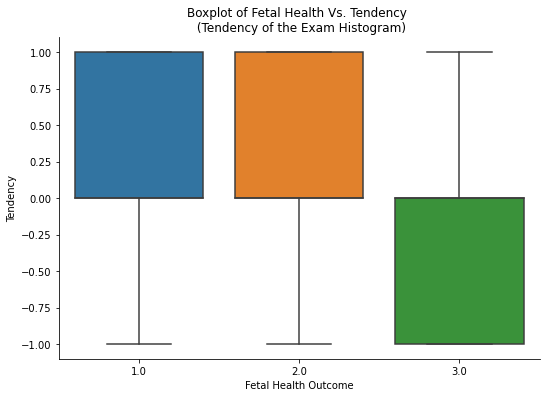

In [80]:
# boxplots of fetal health vs histogram_tendency
sns.catplot(x="fetal_health", y="histogram_tendency", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Tendency \n (Tendency of the Exam Histogram)")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Tendency")
plt.xticks(rotation=0)
plt.show()

In this boxplot we can see that there are no outliers in this data, and we can also see that there is a strong negative correlation between tendency and fetal health outcome.

### Conclusion

**Will I be able to answer the questions I want to answer with the data I have?**

Our preliminary analysis suggests no reason our data should not perform suitably for modeling with some adjustments for scaling and normalization. No missing data was found. Histograms and descriptive statistics were used to conduct univariate analysis on all variables. Multivariate analysis was conducted using correlations matrices and box plots to illustrate variable distributions across our 3 target classes for fetal health outcome: Normal(1), Suspect(2), and Pathological(3). 
Our preliminary analysis with correlations showed that variation in many of our features are associated with variations in our target classes. The relationships are not necessarily strong, but combined, they will likely offer appropriate training for our predictive models. The strongest relationships to our target classes were related to CTG features involving deceleration at .50 Tau and abnormal variability, with those Tau’s ranging from .25 to .43 

**What visualizations are especially useful for explaining my data?**

Histograms, while simple, were in many ways most effective in conveying data issues to consider. Knowing data is skewed, differently scaled, imbalanced, or lacking variation in measures, lends a lot for our preprocessing needs as mentioned above. Histograms related to heart decelerations per second, were found to be highly imbalanced. But upon further inspection using value counts, the rare values represented cases with most serious of the health outcomes (pathological). Box plots, however, were more effective in allowing us to understand how our features distribute and relate to our target classes. Short-term abnormal variability appeared to have a positive linear relationship across our target classes as they ranged from health to pathological.

**Do I need to adjust the data and/or driving questions?**  

The analysis shows that some steps, such as scaling, and normalization for some variables will have to be taken prior to being used as input for our models. Strong correlations between variables were also shown between different central measures related to ETC histograms (mean, median, and mode), which led to the dropping of variables for median and mode. We also know that our target data will require us to use sampling techniques to balance our target classes when model training. So, while changes will have to made, the data itself and questions remain appropriate. 

**Do I need to adjust my model/evaluation choices?**

At this time, our model choices appear reasonable. We have chosen both a neural network classifier and a naive Bayes classifier for modeling and comparison. It is possible that the independent treatment of features within a naive Bayes may not be as well suited. The features may share probabilistic qualities with each other given the specialized topic. Box plots, also illustrate what appear to be nuanced difference in feature distributions across target classes. While we do not have the domain expertise to objectively know, our current model choices can be compared to offer some insights. The confusions matrices we have chosen to evaluate results will help illustrate how well our model discerns between classes.  

**Are my original expectations still reasonable?**  

Given the steps we can take to prepare data for modeling, our plans for modeling seem reasonable. We will have a Neural network classifier and a naïve Bayes classifier planned to compare. Our preliminary analysis shows no indication an effective model cannot result from this dataset. The target classes may be imbalanced, but we can utilize over sampling techniques to give our model more proportionate data to work with. The data has no missing values, and there is no reason to believe any of the observations were made in error. We also already know that many of our features have some established relevance to predicting fetal outcomes as they represent output features from existing diagnostic techniques. 
